In [7]:
#GLIMS buffer + clip
#May 25,2023 

import os
import geopandas as gpd


In [5]:
help(geopandas)
#help(gpd)

Help on package geopandas:

NAME
    geopandas

PACKAGE CONTENTS
    _compat
    _config
    _decorator
    _vectorized
    _version
    array
    base
    conftest
    datasets (package)
    explore
    geodataframe
    geoseries
    io (package)
    plotting
    sindex
    testing
    tests (package)
    tools (package)

DATA
    options = Options(
      display_precision: None [default: Non...USE_PYGEO...

VERSION
    0.12.2

FILE
    /Users/milliespencer/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/geopandas/__init__.py




In [9]:
data_directory = os.path.join(os.path.expanduser("~"),'Desktop', 'GitHub', 'Chile-Glaciers', 'data')
#tilda tells it to go look for the home of your computer 
data_directory

'/Users/milliespencer/Desktop/GitHub/Chile-Glaciers/data'

In [10]:
studyareas_path = os.path.join(data_directory, 'studyareas', 'studyareas.shp')
glims_path = os.path.join(data_directory, 'RGI_17.SouthernAndes', '17_rgi60_SouthernAndes.shp')


In [13]:
studyareas = gpd.read_file(studyareas_path)
glims = gpd.read_file(glims_path)


In [20]:
print(glims.crs)
print(studyareas.crs)
#studyareas.bounds

utm_19s_crs = 'EPSG:32719'
studyareas = studyareas.to_crs(utm_19s_crs)
glims = glims.to_crs(utm_19s_crs)

print(glims.crs)
print(studyareas.crs)

epsg:4326
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
EPSG:32719
EPSG:32719


In [27]:
#first clip glims to the study areas: 
glimsclip = glims.clip(studyareas)
glimsclip = glimsclip.dissolve()

#buffer time! :) 
glimsclipbuffer = glimsclip.buffer(500)

/Users/milliespencer/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pygeos/set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/milliespencer/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pygeos/constructive.py:175: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


In [31]:
#glimsclip.geometry = glimsclipbuffer
#glimsclip
#nvm, geometry is kind irrelevant here since it'll only give us glacier area (eg) for the 1st one of the mega glacier polygon

glimsclipbuffer.to_file(os.path.join(data_directory, 'glims_buffer', 'glims_buffer.shp'))


<Axes: >

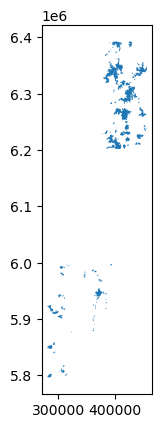

In [33]:
glimsclipbuffer.plot()
